# D4C Practice Exam

This is the D4C practice exam. We will be going over this exam, and answers during class on April 25th. After class, the final exam will be uploaded.

## Question 1 

A web scraper was created to scrape the content from all of Shakespeare's plays, at the website http://shakespeare.mit.edu/ and store all of their content in an organized way. The following is a subset from that scraping code. Fill in the missing "TODO" and retrieve links for all of the comedies, histories, and tragedies. If successful, you should print out a list of each set of links.

In [1]:
import requests
from bs4 import BeautifulSoup

class ShakespeareScraper:
    
    def getPage(self, url):
        session = requests.Session()
        headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"}
        print("Retrieving URL:\n"+url)
        try:
            req = session.get(url, headers=headers)
        except requests.exceptions.RequestException:
            return None
        bsObj = BeautifulSoup(req.text, "lxml")
        #Removing the italicized direction text in the scripts to make things a little cleaner
        [x.extract() for x in bsObj.findAll('em')]
        return bsObj
    
    def getPlay(self, playLink, playType):

        print(playType+": "+playLink)

    def getPlays(self):
        home = self.getPage("http://shakespeare.mit.edu/")
        table = home.find("table",{"align":"center"})
        
        #TODO: Get links for each of the comedies, histories, and tragedies here
        row = table.findAll("tr")[1]
        columns = row.findAll("td")
        comedies = columns[0].findAll("a")
        histories = columns[1].findAll("a")
        tragedies = columns[2].findAll("a")
        poetry = columns[3].findAll("a")
        for comedy in comedies:
            self.getPlay(comedy.attrs['href'], "COMEDY")

        for history in histories:
            self.getPlay(history.attrs['href'], "HISTORY")

        for tragedy in tragedies:
            self.getPlay(tragedy.attrs['href'], "TRAGEDY")
            
crawler = ShakespeareScraper()
crawler.getPlays()

Retrieving URL:
http://shakespeare.mit.edu/
COMEDY: allswell/index.html
COMEDY: asyoulikeit/index.html
COMEDY: comedy_errors/index.html
COMEDY: cymbeline/index.html
COMEDY: lll/index.html
COMEDY: measure/index.html
COMEDY: merry_wives/index.html
COMEDY: merchant/index.html
COMEDY: midsummer/index.html
COMEDY: much_ado/index.html
COMEDY: pericles/index.html
COMEDY: taming_shrew/index.html
COMEDY: tempest/index.html
COMEDY: troilus_cressida/index.html
COMEDY: twelfth_night/index.html
COMEDY: two_gentlemen/index.html
COMEDY: winters_tale/index.html
HISTORY: 1henryiv/index.html
HISTORY: 2henryiv/index.html
HISTORY: henryv/index.html
HISTORY: 1henryvi/index.html
HISTORY: 2henryvi/index.html
HISTORY: 3henryvi/index.html
HISTORY: henryviii/index.html
HISTORY: john/index.html
HISTORY: richardii/index.html
HISTORY: richardiii/index.html
TRAGEDY: cleopatra/index.html
TRAGEDY: coriolanus/index.html
TRAGEDY: hamlet/index.html
TRAGEDY: julius_caesar/index.html
TRAGEDY: lear/index.html
TRAGEDY: macb

## Question 2

<b>A.</b> You want to continue writing this web scraper for Shakespeare's plays to analyze his word usage by play type (History, Tragedy, Comedy, Drama), play, act, scene, and character. Assuming you're using a MySQL database, describe in detail (using words, pictures, and/or MySQL commands) the table structure for this database. Your description should include the type of each data stored (string, float, int, etc) and how much space is allocated for each

<b>B.</b> Using the structure created in part A, write 3 MySQL queries for the following:
1. All lines with the character's name
2. A list of characters that appear in Romeo and Juliet 
3. All lines that contain the word "snake" (or "snake" as a string of characters in the line)

It may be helpful to keep in mind that some Shakespeare characters (particularly in the histories) have lines in multiple plays. 

- Plays
    - id (int, 4)
    - title (string, 60)
    - year (int, 4)
- Characters
    - id (int, 8)
    - name (string, 20)
    
- Scenes
    - id (int, 8)
    - playId (int, 4)
    - title (string, 60)
- Lines
    - id (int, 8)
    - playId (int, 4)
    - characterId (int, 8)
    - text (string, really big)

B 
1. SELECT * FROM lines JOIN characters ON lines.characterId = characters.id;
2. SELECT characters.* FROM lines JOIN characters ON lines.characterId = characters.id JOIN scenes ON lines.sceneId = scenes.id JOIN plays ON scenes.playId = plays.id WHERE plays.title = "Romeo and Juliet" GROUP BY characters.name;
3. SELECT * FROM lines WHERE text LIKE "%snake%";


## Question 3

Below is an subset of data from "CausesOfDeath_France_2001-2008.csv" 

Below is sample code to read in the CSV data and create a list of dictionaries to store it. 
Create a data visualizations with MatPlotLib that display the data in an interesting and useful way. For example, you might compare deaths between females and males, or deaths across the time. You may want to do some string parsing on the "cause of death" For instance, considering all "Malignant neoplasms/melanomas" as "cancer"

[{'cause': 'All causes of death (A00-Y89) excluding S00-T98', 'sex': 'Males', 'year': '2001', 'number': '277 858'}, {'cause': 'Certain infectious and parasitic diseases (A00-B99)', 'sex': 'Males', 'year': '2001', 'number': '5 347'}, {'cause': 'Tuberculosis', 'sex': 'Males', 'year': '2001', 'number': '545'}, {'cause': 'Meningococcal infection', 'sex': 'Males', 'year': '2001', 'number': '30'}, {'cause': 'Viral hepatitis', 'sex': 'Males', 'year': '2001', 'number': '471'}, {'cause': 'Human immunodeficiency virus [HIV] disease', 'sex': 'Males', 'year': '2001', 'number': '892'}, {'cause': 'Neoplasms', 'sex': 'Males', 'year': '2001', 'number': '91 737'}, {'cause': 'Malignant neoplasms (C00-C97)', 'sex': 'Males', 'year': '2001', 'number': '88 481'}, {'cause': 'Malignant neoplasm of lip, oral cavity, pharynx', 'sex': 'Males', 'year': '2001', 'number': '3 755'}, {'cause': 'Malignant neoplasm of oesophagus', 'sex': 'Males', 'year': '2001', 'number': '3 442'}]
DeathsList:
[{'number': 161206, 'year

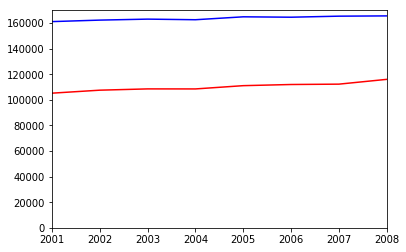

In [18]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
causes = []
with open('data/CausesOfDeath_France_2001-2008.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        causes.append({"year":row[0], "sex":row[3], "cause":row[5], "number":row[6]})
#If you see data printed out below, it's running correctly! Please remove this line before submitting
print(causes[0:10])

def getYearsDeaths(causes):
    deathsPerYear = defaultdict(list)
    
    for cause in causes:
        number = cause["number"].replace(" ", "")
        if number == ":":
            number = 0
        deathsPerYear[int(cause["year"])].append(int(number))
    
    deathsList = []
    for year in deathsPerYear:
        deathsList.append({"year": year, "number":sum(deathsPerYear[year])})
    
    deathsList = sorted(deathsList, key=lambda k: k['year'])
    print("DeathsList:")
    print(deathsList)

    return [x["year"] for x in deathsList], [x["number"] for x in deathsList]

def getCancerDeaths(causes):
    causes = [cause for cause in causes if "Malignant " in cause["cause"]]
    male = [cause for cause in causes if cause["sex"] == "Males"]
    female = [cause for cause in causes if cause["sex"] == "Females"]
    years, maleNumbers = getYearsDeaths(male)
    years, femaleNumbers = getYearsDeaths(female)
    return years, maleNumbers, femaleNumbers

years, maleNumbers, femaleNumbers = getCancerDeaths(causes)
print(maleNumbers)
print(femaleNumbers)
#Add visualization code here
plt.plot(years, maleNumbers, c='b')
plt.plot(years, femaleNumbers, c='r')
plt.axis([2001, 2008, 0, 170000])

plt.show()




## Question 4

Find a linear regression for the following data and plot your solution in matplotlib

Hint: a*b^(cx) is a very popular form of equation

[ 132.62997625    1.64488541    0.85511891]


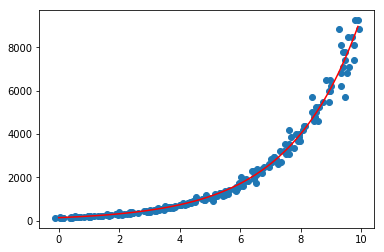

In [36]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

data = [[-0.12957458493291407, 120.08830919970939], [0.10073978762244398, 120.07835118653924], [0.04093944460415541, 125.62300110346123], [0.1519048557236911, 125.80358444967656], [0.12961729570498343, 130.97200680761568], [0.36914164198874566, 131.00549440705686], [0.4546134402626672, 136.55631836767355], [0.14549447961278347, 137.0543145076428], [0.048359127248428835, 143.06900202298652], [0.5579981364998139, 142.64287807023626], [0.5470887482575052, 149.36890576052986], [0.39740799292132223, 149.71339646251104], [1.0459258114679788, 155.7805459223385], [1.0476244611465733, 155.71711823993715], [0.6866620137299129, 162.95353728339805], [0.6768990640495708, 163.32784528392048], [0.7190947984283421, 170.36755485127216], [0.6968684739966791, 170.6617804377939], [0.9919212746443504, 178.1695277131471], [0.8410312976388307, 178.1091800843148], [1.1645340506157098, 186.08956215847653], [1.3108748034217683, 186.34495452636975], [0.9710528177212362, 194.620099302721], [0.5329487743480193, 194.20319359397323], [0.9985521578741667, 203.31659424255477], [1.050218608923399, 203.28962179323807], [1.6479057412386837, 212.36130234811762], [0.9940314299631745, 212.49269148312146], [1.4085897916273613, 222.2055386438548], [1.4189379847905033, 221.71495775376613], [1.444030032280183, 231.61439649517575], [1.7158454846028095, 231.87616136415335], [1.610682944865791, 242.09367787860234], [1.6986234852579176, 242.018163392499], [2.0891675073146385, 253.27229136307028], [1.684075384244024, 253.25336603213702], [1.6727058060130966, 264.5785724916006], [1.6633331793359243, 264.2998862155398], [1.6121372565475327, 276.384559586859], [1.9683414786517184, 276.54069340956204], [1.8807313389886615, 288.81627277770014], [1.5850909227985268, 288.8300577476448], [2.1523344822322295, 301.5745825368575], [2.2597798856320184, 301.6143597246724], [2.370498605147058, 315.08408949818875], [1.8825311687183501, 315.19838868677584], [2.4335325605669196, 329.1754410569364], [2.4738170329664166, 329.00951781112286], [1.9948385669728848, 344.20737348492884], [2.416134487274648, 344.0038984823306], [2.3097371777483584, 359.19888668037964], [2.6232296146354237, 359.55859841652887], [1.9888709376643128, 375.431270230353], [2.4271568946761266, 375.53257275156153], [3.0230969008170097, 392.3517086890148], [2.3683256286539445, 392.3830106643201], [2.91671428040291, 409.9269018897693], [2.943040896665495, 409.5862255839091], [3.2322420215694767, 428.1753677130465], [2.9009747731344935, 428.82261334436384], [3.1860449448030876, 447.66249880174263], [2.830184903244208, 447.7495997124933], [3.1636534970513415, 467.48604162915353], [3.0301004906397577, 467.7418727883014], [3.479207929432883, 488.9080646719288], [3.326259873669445, 488.9312822151947], [3.4807084059850704, 510.61716372376935], [3.248590455632739, 510.45014679904295], [3.350208664110587, 533.9016969910883], [3.3492347501231325, 533.4222494506006], [3.2832526501891652, 557.1716514648641], [3.7713352714606017, 557.605090881937], [3.5730972564886248, 582.4491245390327], [3.678544444219675, 582.4896987636845], [3.687970765896632, 608.361529669516], [3.8524356692076243, 608.7046142067651], [3.6124949179801735, 635.9237689420701], [3.713727520539532, 636.0640008954659], [3.531726373196754, 664.727395831972], [3.8354967832194418, 664.0786059474873], [4.032145778055321, 694.2460262188516], [4.020036705607621, 694.7247531264538], [4.193515624725878, 725.4449449415001], [4.001831762573808, 724.9819436720314], [4.242298302604235, 758.2377506780985], [4.229634084635811, 757.879592761841], [4.278067143893536, 792.1051909706388], [4.288293592146573, 792.0061929514096], [4.388103730328739, 827.6925707540275], [4.096696987312725, 827.7384856099436], [4.523793220402741, 864.6987281023438], [4.341200007779167, 864.6026619588142], [4.439483092630963, 903.8327261804197], [5.116947830333952, 903.445873326061], [4.798624544442028, 944.1790440608174], [4.848912575051568, 944.1038090984582], [4.752340824975136, 986.564966025974], [4.55492738158892, 986.3570991351115], [5.002835727618247, 1030.7203423673377], [5.084293051384244, 1030.7109414831618], [4.5573215867990395, 1076.5769726849003], [5.144270675415503, 1076.6049475285793], [5.429302685850292, 1125.0919948336616], [5.220683817131692, 1125.053177390319], [5.5172897344572664, 1175.4317892583153], [4.8862415094667115, 1175.2475972157035], [5.600505336051116, 1228.6113023777725], [5.160664070547949, 1227.998762267297], [5.321622336353742, 1283.511441134785], [5.347745598037797, 1283.3128676187687], [5.874236402688349, 1340.6651300131136], [5.505571527144953, 1340.9456011110417], [5.635609650010734, 1401.3166353227732], [5.838657129118704, 1401.0565629336359], [5.901591866291746, 1463.9925160633845], [5.808472130747904, 1464.2794621616645], [5.9182125519205995, 1529.7500350195469], [5.871354113652266, 1529.6573908894713], [6.081653387175338, 1598.3491726516324], [6.011578833171568, 1598.5865174359633], [5.953706094271572, 1670.0662097922411], [5.95205433998699, 1669.94758684015], [5.960988056012678, 1744.8117354468518], [6.515082714211426, 1745.2158966660304], [6.158216611567738, 1823.445039105376], [6.267819184312235, 1823.149219099137], [6.1909294079095245, 1905.4405106597446], [6.458878736896164, 1905.1285668464443], [6.0463979679917585, 1990.6405796185868], [6.4604196035097585, 1990.3053978644516], [6.538898561401766, 2079.980086315421], [6.501392937475549, 2079.56069755052], [6.731570031490734, 2172.87566550594], [6.608455688549649, 2173.262700470844], [6.4736148599095875, 2270.5795146253286], [6.40739271920087, 2270.5630439371516], [6.560903761288103, 2372.5323914096944], [6.720811399870822, 2372.567677574579], [6.802398572840901, 2479.0145044057963], [6.955306419637333, 2478.760200383772], [7.250517595576317, 2590.2865127051105], [6.951861451605288, 2590.338301567791], [7.36969771563302, 2706.5333654397355], [7.06412505542084, 2706.209265101029], [7.039547084643021, 2827.753085893007], [7.187734019679068, 2827.819560089411], [7.123021107728854, 2954.150048626508], [7.137209594971357, 2954.315525633623], [7.63053128284199, 3087.4132733280057], [7.512710786844975, 3087.5229421894], [7.329253793275692, 3225.533088955326], [7.458112442620899, 3226.0597088637874], [7.609537741000678, 3370.4200860224773], [7.7903112100153775, 3370.3957327409576], [7.611192213021033, 3521.6006941233027], [7.490755140819771, 3521.4416672163443], [7.918372119174291, 3679.4193722597756], [7.996764193661057, 3679.6402463751197], [7.67587960363876, 3844.435180733126], [7.940484446332703, 3844.184585888225], [7.847705378383471, 4016.8716216108705], [7.9540097792146325, 4017.2037250285985], [8.077615333674615, 4197.280380794538], [7.620288486740211, 4197.372248866064], [8.140655544041586, 4385.718064388182], [8.127562499448134, 4385.750477875121], [8.451958388701003, 4582.341685654894], [8.58388414617532, 4582.167757401165], [8.466102890884407, 4787.4184853654315], [8.452641955708842, 4788.092696944487], [8.391573745790977, 5002.91212705831], [8.511306050523059, 5002.739823526615], [8.502259032723169, 5226.563937417989], [8.613193832526722, 5227.029527056585], [8.936875785205764, 5461.883406044737], [8.731041734015607, 5461.534268407338], [9.45950148222008, 5706.728080760307], [8.387435340892734, 5706.883489615734], [8.9320004096135, 5962.530987219907], [8.982538897509421, 5962.587665304134], [9.020245124112135, 6230.020270297544], [9.337364482405597, 6230.386589656168], [8.960475261955853, 6509.834248868192], [8.85211522799209, 6510.075062169993], [9.551746037620237, 6801.891429191429], [9.335701716102205, 6801.765334552591], [9.418613232944395, 7107.040247774498], [9.602726911712729, 7106.78429861597], [9.48553768186106, 7425.739730431086], [9.75518514193103, 7425.528165129376], [9.455662129940178, 7758.877946692445], [9.414157147678102, 7758.858122843074], [9.784273243843852, 8106.90251055326], [9.334703972529208, 8107.055054459699], [9.574306715237338, 8470.588112091184], [9.709474189666729, 8470.842802011697], [9.28936844538819, 8850.454002689354], [9.923141953537222, 8850.62190186519], [9.904327723754683, 9247.766852275126], [9.793135452672704, 9247.674971169188]]


def test_curve_function(x, a, b, c):
    return a * b**(c*x)

#Show points
plt.scatter([datum[0] for datum in data], [datum[1] for datum in data])


popt, pcov = curve_fit(test_curve_function, [datum[0] for datum in data], [datum[1] for datum in data])
print(popt)

plt.plot(np.arange(0, 10, .1), [test_curve_function(x, popt[0], popt[1], popt[2]) for x in np.arange(0, 10, .1)], c='r')

plt.show()

If you're curious, this was the original function (a=120, b=1.15, c=3.14) that I used to generate the data points (note the power of a little bit of noise being able to throw constants way off in exponential functions!)

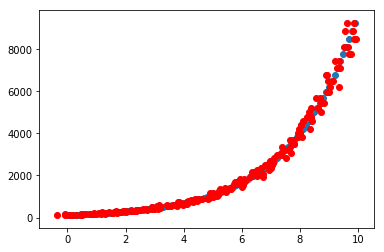

[[-0.07212432031695025, 119.97595420667932], [0.0847238392139206, 119.63525341605998], [0.2908951804468177, 125.54974489595624], [-0.3480147623984845, 125.3041327440751], [0.07285955870490843, 131.18793119276006], [0.483651684338315, 131.16651624930253], [0.16000627687247634, 136.95603598471126], [0.10454457991267982, 137.085810225864], [0.12748492762312252, 143.44548315290368], [0.4710367437552835, 142.93955885182905], [-0.07570644842004759, 149.51755971299627], [0.47393765042556285, 149.720300483118], [0.5982247290141268, 156.4466363992121], [0.8511491004622876, 156.25469826881823], [0.9324909632787545, 163.09062926908211], [0.7875534594791187, 163.3318153590882], [0.9612577759229906, 170.36438025117803], [1.1456914886385205, 170.56711958661046], [0.9403456700401921, 177.81658578462176], [0.8959296513481246, 178.13036424140878], [1.2818555251740797, 186.2815801631275], [0.8764997400616841, 185.76473664320116], [1.1179038338822511, 194.4048303020205], [1.2883845056852337, 194.40439684

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def function(a):
    return 120*1.15**(3.14*a)

x = []
y = []
data = []
for i in np.arange(0,10.0,.1):
    x.append(i)
    y.append(function(i))
    data.append([i, function(i)])

jittered = []

for i in range(len(data)):
    jittered.append(np.random.normal(loc=data[i], scale=.2).tolist())
    jittered.append(np.random.normal(loc=data[i], scale=.2).tolist())
x_j = [p[0] for p in jittered]

y_j = [p[1] for p in jittered]


plt.scatter(x, y)
plt.scatter(x_j, y_j, c='r')
plt.show()
print(jittered)

## Question 5

<b>A.</b> Cluster the data below and show your clusters with a matplotlib plot (function to do this has been provided for your convenience, although you are free to modify this function). 

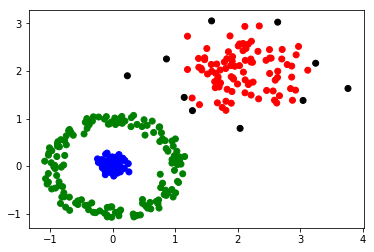

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


def graphClusters(data, labels):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    plt.scatter([datum[0] for datum in data], [datum[1] for datum in data], color=[colors[label] for label in labels])
    plt.show()
    plt.clf()

data = [[-0.00873937715542836, -0.10174797258185078], [0.05848281783408541, -0.08815441211687954], [-1.0300018196771823, -0.33559472607969987], [0.14975283547071036, 0.16133442588873273], [-0.024310989806344815, -0.13762478606333584], [0.054378511043854896, -0.0026677071882821868], [0.053559131745367416, 0.018441087248064973], [0.9484806053806573, 0.13836811528934442], [-0.05176787223060562, -0.047168328947323035], [0.52536317527636, -0.8333801329049879], [-0.8139958466867516, -0.6485104636682248], [-0.39489960740392405, 0.8867658379928163], [0.4420140784737666, -1.025423330930612], [-0.011128525879177013, 0.03798909900110386], [-0.7787417813532351, -0.6445739982240501], [-0.7822048945199643, -0.5597045730552643], [0.5006702450913756, 0.9754223745834848], [0.09419009205556489, -0.06852643929110155], [0.11477044353972561, 0.07261910526940506], [-0.9162462546877201, -0.4612908894460738], [0.33856294954568517, -1.0676784821466596], [-0.02286826637052794, 0.9281468502757539], [-0.07067011970901547, 0.8832577788851168], [0.04379793732611724, -0.9715771466118046], [1.1503121741947355, 0.20238895748368604], [0.04481506229863713, -0.06061317461419604], [-0.8963699419418435, -0.19579305065292496], [0.0999127907150465, 0.24318171650801618], [-0.14036874810496347, 0.10000298779086209], [0.022593325516898015, 0.01248813740890043], [0.12075556895683479, -0.12112440806850884], [0.09131088245291914, -0.05358282144299813], [-0.03933284616126542, -0.10572389823691279], [-0.04989168511078562, -0.016967671758164], [0.012979807461766376, 0.07346530559582137], [-0.030949572691108446, 0.07713622838045281], [1.1189927612680823, -0.160816796783938], [-0.4382349388465126, 0.9225360752086743], [-0.0014569654314894962, -0.03054121228937792], [-0.05531803338278939, -0.011931593972018394], [-0.050804480172917506, 0.8896197072310298], [0.9469206155766077, 0.529716025624891], [-0.07380551376531698, -0.09207533431975885], [0.8545805682394554, 0.36909056419429637], [-0.05955371537742131, 0.02874048796210282], [0.15164242882037107, 0.9007358053096651], [-0.24306067171094445, 0.15258163990093063], [1.0707288990553814, 0.13624260518407058], [0.5162783043258955, 0.6520160718523375], [-0.034270741164534796, 0.009841777978491489], [-1.0742147905767625, -0.2635407882898], [0.766824987596697, -0.45072431666651347], [-0.003471158196278255, 0.06914536424076077], [-0.0608871575898851, 0.013760402027628967], [0.4763195847036398, -0.7817512350172323], [-0.0661298852199908, -0.018603036076641235], [-0.17523332325004776, 0.13679531945459614], [-0.1068810650855139, 0.025040368087423895], [0.7403246166165021, -0.8806983952019218], [0.015924509776101894, 0.14934451619439876], [-0.039498479234582995, 0.12936242321816688], [0.38824460411292283, -1.036508803387403], [-0.12861069859193977, -0.06483659908561809], [-0.10961407356120868, 0.024273628375629366], [0.06132869690984555, -0.02387373231386415], [0.6309449770633151, 0.9471748016688979], [0.06874360343924418, 0.14961603237772927], [-0.22571446842103982, 1.0327578945761327], [-0.0724129932147592, -0.112796137218834], [0.549716764915836, 0.8577445138078831], [-0.09074430912166773, 0.2745872401343565], [1.0362008545265022, -0.32052706878738124], [-0.63147106925831, 0.6493412780615013], [-0.8937973849290055, 0.2025712358205619], [-0.8229874126966296, -0.02017282725751274], [-0.015318218746483873, -0.8543546974064524], [-0.5572591155847149, -0.8062889832260155], [0.056143853994335996, -0.04570048486206142], [-0.1661904104589497, -0.03476346737453534], [-0.12590036764775098, -0.08555728764554242], [-0.6917670548887822, 0.7700672373597116], [-0.6857157004998566, 0.7141853795300677], [0.9821021589142529, 0.12002003933120726], [-0.08715593552911427, -0.8677895883203903], [0.14533361439739678, 1.044550905079361], [-0.06555939944210762, -0.0972488940283242], [-0.27345805154292224, -0.9776203835778093], [-0.07324497328442751, 0.0030392753677768378], [-0.8356306412615159, -0.7845149901842354], [0.19516272764515497, 0.11872745955662159], [0.07147200810503547, 0.12419107982500249], [-0.6942083326368549, -0.6513108804385058], [0.6091203494338864, -0.8982569482952154], [-0.7437688782563745, 0.6369686745409686], [0.00972625845344684, -0.0782725754678599], [0.013949622514265389, 0.06465172929291248], [-0.3354350180152512, -0.7726668365406242], [-0.8830228236093647, 0.4190209565327971], [-0.30950444620918793, 1.0372060665311318], [-0.12436550919282699, -0.03491201866478727], [-0.05854109223614293, -0.0264390784295773], [-0.07781181847716895, 0.005125753360255492], [-0.13203590873465726, 0.9890446994702705], [0.07575603664111268, -0.045719485965539264], [-0.8586361901965739, -0.3295923775074451], [-0.8773756814138789, 0.5137719339526812], [-0.10742408324195499, -0.022999625388460745], [-0.011650530283167175, 0.0705924981293858], [0.005143885070998866, 0.09657585544501715], [0.0548488193465705, -0.14741099966685128], [-0.08438782083301986, -0.03430146426519216], [0.015781339075915387, -0.2081040232343735], [-0.010974526920040155, -0.06766175581166893], [0.08261149463568676, 0.11861162569321831], [-0.054463092981849745, -0.031296702788192514], [-0.08532930868464433, -0.0547344524076427], [0.7239193694307637, -0.7903833853948021], [0.296938496256394, 1.0202258135440132], [-0.05839716090770708, 0.0399288830143885], [-0.9292885329530767, 0.018269669009490442], [0.46847962427729783, 0.832606940769435], [-0.04214109926947235, -0.860173687655335], [0.09926327656408326, 0.9181774520772658], [-0.09982166180697476, 0.07781894856577451], [-0.10226426919192921, 1.0410619170676445], [0.7959668835222976, 0.5739226727223029], [0.2917798331041673, 0.8306249306919231], [0.03571704686062491, 0.06093710450220666], [-0.024169773178208988, -0.002826699545153121], [1.0057069160167096, -0.5608711901420456], [0.14835101677743756, -0.048594187374104904], [0.9868289401249147, -0.08886734640893494], [0.01830515260378987, -0.014095781168967151], [-0.08128105400788539, -0.006229279893082251], [-0.6693894914072078, 0.7152498884494397], [-0.028873070760900652, -0.13483281147751136], [0.32725893554229535, -1.0059956843456614], [0.749643425738237, 0.8262626204612387], [0.9671253020384807, 0.42026448100130137], [-0.03791705656757002, 0.10370324099222618], [0.04463961908061331, 0.8754664595728712], [-0.07090735729554823, -0.0034617650646647335], [-0.689162631719869, -0.9292649523498586], [-0.11843675383846665, -0.11597828132865999], [0.07204509539808585, -0.14564961726420755], [-0.5576419531963634, -0.72982590807068], [-0.08647284644505215, -1.066349630236132], [0.16211559221998545, 0.1655305868830955], [-1.0498222309137326, -0.375727672564774], [-0.4141410392408651, 0.9997248097327177], [-0.024752187357144993, -0.03946281408374307], [0.8846667693124953, -0.5584540487944729], [-1.0207393369234214, 0.2774125929592669], [-0.03492606995524301, 0.10781903238516188], [-0.9762562249910567, -0.4795397758853963], [-0.37671440126710276, 0.870539334741415], [-0.41012085992888386, 0.79390599841655], [-0.1085237277371562, -0.03590492464560563], [0.01617666027919269, 0.03580058194940117], [-0.11406828946746149, 0.2503473627778893], [-0.7052330618888489, 0.7481740036546196], [0.7424129994801325, 0.8174373977721986], [-0.9842803118804258, 0.07096450442529417], [0.18150396512307798, -0.044539792851959026], [-0.8535749635918007, 0.4070113267596791], [0.01994839752059158, -0.032449276717813696], [0.7788885482974696, 0.6992585285290196], [-0.8020228101305573, -0.4303565176903348], [-0.5940772118687748, -0.7739777538727546], [0.5571883072561137, -0.8818129177123784], [-0.7529390685150286, -0.8624098718295325], [0.9465913332426227, 0.06336870922671861], [-0.09720256296345008, -0.0843273742192969], [-0.1497366872311968, 0.02959057715106471], [-0.8543615773006938, -0.40745480814562113], [0.03920001359697868, -0.06724770199598669], [0.333241887365034, 1.0669921491358694], [-0.7678706872376679, 0.22521736851696356], [1.0343140496331047, 0.03221043728920063], [0.9458491884795822, -0.4912835763926608], [-0.09714465463793372, -1.0229041558782803], [-0.02755967670357346, 0.02637096912148805], [0.07734269408307586, -0.046336217913763064], [-0.9215117238964605, -0.051110325975193084], [0.09173817126059802, -0.042975303367992636], [-0.034892346994056224, 0.06248150433167906], [-0.7851025338476905, 0.024148188204543813], [0.8829663462320058, 0.3141199569397702], [0.6545001452005766, 0.7082284137912755], [0.8378591922923463, 0.5360970117995727], [0.12883297527034485, 0.9372862035898893], [-0.39283725766721955, -0.819734811803435], [-0.017156297214511007, -1.0744448160188358], [-0.7425680462627802, 0.44817305161129384], [0.07804860321571354, -0.12140898688022514], [0.0009065987523271604, -0.0352988865523676], [-0.016813281735082817, 0.04226565967076462], [-0.054811954501482234, 0.0864017935289445], [0.12705157711328097, 0.13419861197654806], [-0.8847232506251603, 0.47161597187943116], [-0.07277566245427314, 0.06982384261442671], [-0.007091204233837179, 0.19488957036742088], [0.0505086705570361, 0.05185384137962812], [-0.06829635489080618, -0.08107412609763694], [-0.17733233585838096, 0.03033716692426674], [0.08015765983853129, -0.097384351537139], [0.044510816154560096, 0.13857199844472012], [0.752661990251456, 0.5181500504273174], [-0.3858838382370814, -0.9156728154030125], [0.09837644049411569, -1.0428472990054198], [1.0252007805284329, 0.3131221743520312], [1.091317388724398, 0.042994942574384], [-0.04339709525796366, 0.07102047289765685], [-0.3088534484512498, -0.9703932423223509], [0.06202365344726564, 0.04794360494895909], [0.2588404971556183, -0.1208471291990281], [-0.131861430513771, -0.9878027338185813], [-0.049864129550542514, 0.14103141557576884], [0.011824993108018012, 0.022151208204201946], [0.06797544476663764, 0.05644397391011773], [0.05886940539547778, 0.19065992760894956], [0.7968792657254955, -0.35777909416077125], [-0.1137737538998464, 0.03345593113312601], [0.1949023379882036, 0.9491140433513591], [0.6953282562301304, -0.741970115100268], [0.0325360776595568, -0.009373223978760494], [0.11409311444241163, 1.001533951087162], [0.08094879788655372, -0.08627648820369731], [-1.0282572947867683, 0.2318565342358393], [-0.4416974576206781, -0.8240524381366655], [0.016500505108823532, 0.049496297596604955], [-0.12362283291956692, 0.10385623955043342], [0.24814067689824348, 0.05273902337005372], [-0.060037250398490345, 0.04141416074028083], [0.84420432095022, -0.5045378838234572], [0.03131979418134861, 0.0761590303913303], [0.8227366119559233, -0.5973239757111575], [-0.056405268069631906, 0.04847346879091632], [-0.3255737795586578, 0.9473102777427292], [0.965804651987263, -0.6485635393169437], [-0.14865781921870846, 0.10867694861010846], [-0.052040982880990086, 0.052101839116881044], [0.1819475726753852, -0.04456354003307684], [-0.2298348522266927, 0.07824051595315698], [-1.0114278994859531, 0.384927694218327], [-0.047716992550200746, -0.060080109199194806], [0.11003996845642122, -0.04384783237783646], [-1.0878094552664979, 0.10442683201663042], [-0.058446872694839114, -0.09663890382844642], [0.38868813129470237, 0.877361268251747], [-0.004266311389845135, -0.021841689610489823], [1.0724166141162106, 0.19334095806142015], [0.7322378866458861, -0.7103664225967142], [-0.017847677312005997, -0.05896696951504455], [-0.006369337406373453, -0.007816239578832995], [0.1264764462045166, 0.10042031754025087], [-0.8293962723490486, 0.5562572977188414], [-0.04495636606096455, 0.010439903276525133], [0.021955528370477095, 0.008723108526486518], [1.001896736370646, 0.5723768746351928], [0.03271386793443193, 1.0122945162958432], [-1.0302056454077326, -0.15505633586523224], [0.10288998197963993, -0.056704900874695596], [-0.500319831162227, -0.7061157901386115], [-0.021629276477607505, 0.008789338904124273], [0.7597054346301821, -0.17035061956833503], [1.0606950811238074, 0.09169875979444714], [0.012647605235209743, -0.07915764456679529], [0.01572010859088896, 0.05583545725670487], [0.8534220501301971, -0.6147799194473693], [-0.941964356159462, -0.014626469755075686], [0.07260369579468272, 0.11375396813235626], [-0.20751176132234053, -0.9404225142966832], [-0.9744781153679986, 0.32609953039287104], [0.8400303607458769, -0.5874720344021562], [0.00011379268564721753, 0.16239428918125054], [0.4756759068750082, -0.7016507073507949], [-0.08424539647524007, 0.012811158028404986], [0.5962093597017959, -0.7631993388571893], [-0.08797064796660387, -1.0371031124975745], [0.028441618798072478, 0.0373633150407342], [0.10828560164187784, -0.95112473787979], [0.12668527962881643, -0.9220352787208717], [-0.014359199153076534, 0.17358195686132669], [1.0522934372692836, -0.34292091441217687], [-0.11876900653320568, -0.17948264199927372], [-0.4043272379327629, 0.9503173332501637], [-0.03737239414173178, 0.007763762637921945], [0.026331524285392344, -0.0411888078447986], [0.030479042468528224, 0.03443624868358516], [-0.7694919713653939, 0.5354423094936602], [0.9857970883643487, 0.2199957569420232], [-0.1031358712156536, 0.04842966747633351], [-0.040722650257760826, -0.020511859984407937], [-0.4589055967304496, 0.6769083653120384], [-0.1586722005917798, 0.097223879260632], [0.05431626330176294, -0.044401962952431234], [-0.10331237707210256, -0.06432362276283611], [-0.03973518747265661, 0.040997765649506954], [-0.043071192843845536, 0.18526383936373653], [2.2348511181636646, 2.183034860127306], [1.9070358928087383, 1.5685366894484103], [2.5876011519351665, 1.3865771784896772], [1.8099278948976805, 1.173555002129557], [1.895027502976785, 1.880545615502473], [1.50501968891522, 2.4724297362212178], [3.7622442351453795, 1.6330517616866325], [2.2177724635789895, 2.625166256746389], [1.4695448807946536, 2.2386585117955553], [1.7178626022882815, 2.021113075456189], [1.4118915380668424, 2.059205184158571], [2.1670546161702555, 2.5654025623643895], [1.9157196968243166, 2.301750170641891], [2.117816545396841, 1.8132406672252206], [2.5091311202450575, 1.9485268430706144], [0.8594071419362901, 2.253341150174083], [3.24546777929885, 2.1636427326118643], [1.5157854465156486, 1.9372385523280626], [1.5809955114559333, 3.053510409070089], [1.7521497484215305, 1.2339015667251267], [2.1684486006000796, 1.7156019185138114], [1.2747609408911678, 1.1667331191845651], [2.027979082635928, 2.5692050883892255], [1.932510367907882, 1.830543444129591], [2.703285315740752, 2.252545547983772], [2.0846096208597955, 2.578894006900768], [1.829746016854166, 1.6157919970806829], [2.874529636484426, 1.3850231316855024], [2.2450153115925273, 1.767269021478318], [0.23418391937031902, 1.8998448979888987], [2.1150798898150525, 1.5415827564941973], [1.6307483499644966, 1.7766024640786067], [2.862513903733882, 2.1042541340062155], [1.723423211537189, 1.7488274334811156], [2.2089407776601515, 2.2518121602528924], [1.8104626345184291, 1.3648448234981045], [1.6390151636920558, 1.6504257617967109], [2.9334280041243446, 2.3397974102855432], [2.4519227300833943, 2.224728097096322], [1.6797769930259854, 1.8352239666162093], [1.9106003238045557, 2.207823755552616], [1.5760731789794153, 2.137068980367459], [1.785447682084812, 2.1887119941581514], [2.007377860141765, 2.526955697559859], [2.5067452227900655, 2.450783560128669], [2.343807240084665, 2.9473066913619665], [2.5984601242598786, 1.8077955841987992], [1.8756870365281124, 2.7376891816809295], [2.6663838037048864, 1.479858273327276], [1.6737822025388112, 1.330423097517158], [2.3225712827184424, 2.413715004611741], [3.119068329536451, 2.016978090716954], [2.7906724603527384, 2.135699709807522], [2.6380746529363845, 3.0273501216810716], [2.11292546712013, 2.93777069802148], [1.1954235698982427, 2.731710704065864], [2.511043852576357, 2.2728085107669855], [2.565023519045305, 1.5807345937533843], [1.8068912602029599, 2.051968785179663], [1.195641073221629, 2.032111220755246], [1.6623502697447776, 2.147286006137368], [1.684346477611823, 1.87772355826189], [2.1196963647818206, 2.224314151504582], [1.922498264734259, 1.8569773238061769], [1.4698690118736082, 2.2783236289602473], [1.2699278296333047, 1.432463383352546], [2.0834236297996664, 2.4284445703896784], [2.131084427554803, 2.472025048695065], [1.6463725903614912, 1.9537708323076823], [2.6350298011807385, 1.8649741063460972], [2.1873904186463338, 1.7443329709910793], [1.424588749682457, 2.0211235341888636], [1.5839430441377857, 1.9937499788629034], [2.4613271223530204, 1.5915169924341068], [2.036696985112144, 0.7943827654504916], [2.7101027249400107, 2.4532265628680765], [2.971835968496982, 2.5166812228041913], [2.3331961696643715, 1.4144268785986653], [2.026636432760162, 2.113435593807981], [2.2126753968081934, 1.4941479630927903], [2.622584711467418, 1.3276246742213247], [1.9524602881156001, 2.099588330631781], [3.0441811447279363, 1.3812463750066393], [1.372022294160678, 2.264729733721924], [2.8620330431729597, 1.8720298079228759], [1.9957345609884432, 1.7271322295676508], [2.208348156954671, 2.191240182173844], [2.6389443698291712, 1.9960551601717174], [1.3875275602417605, 1.292690109342786], [1.8247391929443981, 2.258737179378549], [2.8443184132117096, 1.6301879648808284], [2.0898695704267554, 1.9762082123057547], [1.8505412076853118, 2.40482697742531], [2.9238970504807944, 1.5978811686717833], [1.8859330307457411, 2.1138762180003576], [1.3769990998925348, 2.0786233031422814], [1.8956607590315133, 1.3238718992315497], [2.533499528571023, 2.270041175783497], [1.142939558535175, 1.4456694195804847], [1.7006749027952113, 1.6642326435024946]]

#Perform clustering here
dbscan = DBSCAN(min_samples=20, eps=.5)
dbscan.fit(data)
graphClusters(data, dbscan.labels_)


<b>B.</b> Explain your choice of clustering algorithm and parameters. Is the clustering good? What sort of metrics can you use to evaluate the performance of the clustering? If additional code is needed to evaluate your clustering, include it above.

Because there exists a cluster centered within another cluster the DBScan algorithm is appropriate

## Question 6

clues.csv contains a file of all Jeopardy clues answered correctly by members of either STEM or arts professions (type = "stem" or type="arts). Create a classifier that attempts to predict whether a player works in the arts or in STEM based on the clues that they answer correctly.

You may or may not be able to create a "good" classifier (this is, after all, real world data), but you should be able to explain what you tried, what was more or less successful, and whether or not you believe this problem is worth pursuing. 

You are free to use any advanced sampling techniques, such as bagging or boosting, in order to do this.

Provided below is some Python that reads the CSV file in and appends all data to a list of dictionaries

In [34]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


clues = []
with open('data/clues.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        clues.append({"profession":row[0], "type":row[1], "text":row[2]})

numArts = len([clue for clue in clues if clue["type"] == "arts"])
print("Arts count: "+str(numArts))
numStem = len([clue for clue in clues if clue["type"] == "stem"])
print("Stem count: "+str(numStem))

print("Percent arts: "+str(numArts/(numStem+numArts)))
print("Percent stem: "+str(numStem/(numStem+numArts)))

vect = CountVectorizer()
X = vect.fit_transform([clue["text"] for clue in clues])
y = [clue["type"] for clue in clues]
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("KNN:")
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

print("Tree:")
tree = DecisionTreeClassifier().fit(X_train, y_train)
print(tree.score(X_test, y_test))

param_grid = {'n_estimators':[5,10,15,20,25,30],'max_depth':[20,25,30,None], 'bootstrap':[True,False]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=4, return_train_score=True)
grid.fit(X, y)

print("Best estimator:")
print(grid.best_estimator_)
print("Best score:")
print(grid.best_score_)
winningEstimator = grid.best_estimator_
print("Best estimator predictions:")
print(winningEstimator.predict(X_test))


Arts count: 612
Stem count: 233
Percent arts: 0.7242603550295857
Percent stem: 0.2757396449704142
KNN:
0.768867924528
Tree:
0.61320754717
Best estimator:
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Best score:
0.72426035503
Best estimator predictions:
['arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts'
 'arts' 'arts' 'arts' 'arts' 'stem' 'arts' 'arts' 'arts' 'arts' 'arts'
 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts'
 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts'
 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts' 'arts'
 'arts' 'arts' 'arts' 'arts' 'stem' 'stem' 'stem' 'arts

## Question 7

The image below represents an ROC curve for a serological test to detect Johne's disease in cows. Because the disease spreads easily, antibody concentrations were measured in blood and fecal samples averaged across the entire herd, and the so cut-off points are for "diseased herds" and "clean herds" rather than individual cows. 

<img src="files/../data/roc_curve.png" width="400px"/>

The white circles and triangles represent the upper and lower 95% confidence intervals for the ROC curve, and the black circles represent the mean values. The researchers choose an appropriate value for the antibody concentration cut-off so that the specificity of the test is 30%.


Assuming that the mean values (black circles) are the true values, if 100 herds are tested and 20 are positive, how many actual cases of Johne's disease can we statistically expect?






***Sensitivity 70%***
***Specificity 30%***
.3 = TP / (TP + FP) = 6 / (20)

.7 = TP / (TP + FN) = 6 / (6 + 2.57)

8.57, or 9